In [1]:
import os
import sys
import pandas as pd
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from aitia_explorer.py_causal_wrapper import PyCausalWrapper 

In [2]:
wrapper = PyCausalWrapper()

In [3]:
data_dir = os.path.join('..', 'test/resources/data/audiology.txt')

In [4]:
df = pd.read_table(data_dir, sep="\t")
df

,age_gt_60,air,airBoneGap,ar_c,ar_u,bone,boneAbnormal,bser,history_buzzing,history_dizziness,...,s_sn_gt_2k,s_sn_gt_4k,speech,static_normal,tymp,viith_nerve_signs,wave_V_delayed,waveform_ItoV_prolonged,indentifier,class
0,f,mild,f,normal,normal,?,t,?,f,f,...,f,f,normal,t,a,f,f,f,p1,cochlear_unknown
1,f,moderate,f,normal,normal,?,t,?,f,f,...,f,f,normal,t,a,f,f,f,p2,cochlear_unknown
2,t,mild,t,?,absent,mild,t,?,f,f,...,f,f,normal,t,as,f,f,f,p3,mixed_cochlear_age_fixation
3,t,mild,t,?,absent,mild,f,?,f,f,...,f,f,normal,t,b,f,f,f,p4,mixed_cochlear_age_otitis_media
4,t,mild,f,normal,normal,mild,t,?,f,f,...,f,f,good,t,a,f,f,f,p5,cochlear_age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,t,mild,f,absent,normal,mild,t,?,f,f,...,f,f,very_good,t,a,f,f,f,p196,cochlear_age
196,t,mild,f,normal,absent,mild,f,?,f,f,...,f,f,very_good,t,c,f,f,f,p197,mixed_cochlear_age_otitis_media
197,f,normal,f,normal,normal,unmeasured,f,degraded,f,f,...,f,f,normal,f,a,f,f,f,p198,possible_brainstem_disorder
198,t,mild,f,normal,normal,unmeasured,f,?,f,f,...,f,f,very_good,t,a,f,f,f,p199,cochlear_age


In [5]:
dot_str = wrapper.algo_fges_discrete(df)
dot_str

'digraph g {\n "air" -> "airBoneGap" [arrowtail=none, arrowhead=none]; \n "late_wave_poor" -> "middle_wave_poor" [arrowtail=none, arrowhead=none]; \n "airBoneGap" -> "ar_u" [arrowtail=none, arrowhead=none]; \n "history_dizziness" -> "static_normal" [arrowtail=none, arrowhead=none]; \n "history_dizziness" -> "history_roaring" [arrowtail=none, arrowhead=none]; \n "ar_c" -> "o_ar_c" [arrowtail=none, arrowhead=none]; \n "age_gt_60" -> "class" [arrowtail=none, arrowhead=none]; \n "bone" -> "boneAbnormal" [arrowtail=none, arrowhead=none]; \n "age_gt_60" -> "m_m_sn" [arrowtail=none, arrowhead=none]; \n "ar_c" -> "o_ar_u" [arrowtail=none, arrowhead=none]; \n "history_nausea" -> "history_roaring" [arrowtail=none, arrowhead=none]; \n "history_fluctuating" -> "m_sn_lt_1k" [arrowtail=none, arrowhead=none]; \n "bone" -> "o_ar_u" [arrowtail=none, arrowhead=none]; \n "ar_u" -> "o_ar_c" [arrowtail=none, arrowhead=none]; \n "history_noise" -> "notch_at_4k" [arrowtail=none, arrowhead=none]; \n "airBoneG

In [6]:
causal_graph = wrapper.get_causal_graph_from_dot(dot_str)
causal_graph

CausalGraphicalModel(age_gt_60, air, airBoneGap, ar_c, ar_u, bone, boneAbnormal, bser, class, history_dizziness, history_fluctuating, history_heredity, history_nausea, history_noise, history_recruitment, history_roaring, history_vomiting, late_wave_poor, m_m_sn, m_sn_lt_1k, middle_wave_poor, notch_at_4k, o_ar_c, o_ar_u, s_sn_gt_2k, static_normal, tymp)

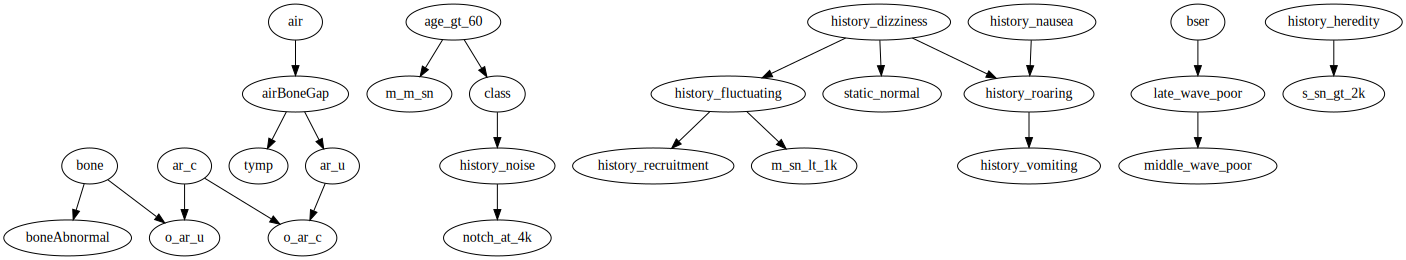

In [7]:
causal_graph.draw()

In [8]:
# get the distribution implied by the graph
print(causal_graph.get_distribution())

P(history_heredity)P(s_sn_gt_2k|history_heredity)P(bser)P(late_wave_poor|bser)P(middle_wave_poor|late_wave_poor)P(history_nausea)P(bone)P(boneAbnormal|bone)P(age_gt_60)P(m_m_sn|age_gt_60)P(class|age_gt_60)P(history_noise|class)P(notch_at_4k|history_noise)P(ar_c)P(o_ar_u|ar_c,bone)P(history_dizziness)P(history_fluctuating|history_dizziness)P(history_recruitment|history_fluctuating)P(m_sn_lt_1k|history_fluctuating)P(history_roaring|history_dizziness,history_nausea)P(history_vomiting|history_roaring)P(static_normal|history_dizziness)P(air)P(airBoneGap|air)P(tymp|airBoneGap)P(ar_u|airBoneGap)P(o_ar_c|ar_u,ar_c)


In [ ]:
dot_str = wrapper.al(df)
dot_str